1. Data Manipulation

a. Read the provided CSV file ‘data.csv’.

b. https://drive.google.com/drive/folders/1h8C3mLsso-R-sIOLsvoYwPLzy2fJ4IOF?usp=sharing

c. Show the basic statistical description about the data.

d. Check if the data has null values.

i. Replace the null values with the mean

e. Select at least two columns and aggregate the data using: min, max, count,mean.

f. Filter the dataframe to select the rows with calories values between 500 and1000.

g. Filter the dataframe to select the rows with calories values > 500 and pulse <100.

h. Create a new “df_modified” dataframe that contains all the columns from df exceptfor
“Maxpulse”.

i. Delete the “Maxpulse” column from the main df dataframe

j. Convert the datatype of Calories column to int datatype.

k. Using pandas create a scatter plot for the two columns (Duration andCalories).

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [144]:
df=pd.read_csv("/content/data-fitness.csv")

In [145]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [146]:
print(df.isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [147]:
df['Calories'].fillna(df['Calories'].mean(), inplace=True)

In [148]:
df[['Duration', 'Pulse']].agg(['min', 'max', 'count', 'mean'])

,Duration,Pulse
min,15.000000,80.000000
max,300.000000,159.000000
count,169.000000,169.000000
mean,63.846154,107.461538


In [149]:
df_new = df[df['Calories'].between(500, 1000)]
print(df_new)

     Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
83        120    100       130     500.0
90        180    101       127     600.1
99         90     93       124     604.1
101        90     90       110     500.0
102        90     90       100     500.0
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [150]:
df_sort = df[((df['Calories'] > 500) & (df['Pulse'] < 100))]
print(df_sort)

     Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [151]:
df_modified = df.drop('Maxpulse', axis=1)

In [152]:
df.drop('Maxpulse', axis=1, inplace=True)

In [153]:
df['Calories'] = df['Calories'].astype('int')

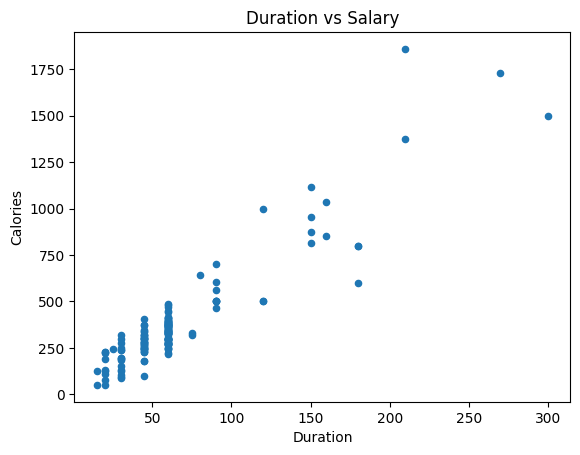

In [154]:
df.plot.scatter(x='Duration',y='Calories')
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.title('Duration vs Salary')
plt.show()

2. Linear Regression

a) Import the given “Salary_Data.csv”

b) Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.

c) Train and predict the model.

d) Calculate the mean_squared error

e) Visualize both train and test data using scatter plot

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [156]:
salary_data = pd.read_csv("/content/Salary_Data (1).csv")

In [157]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [158]:
X = salary_data.iloc[:, :-1]
y = salary_data.iloc[:, -1]

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [160]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [161]:
y_pred = model.predict(X_test)

In [162]:
mse = mean_squared_error(y_pred,y_test)

In [163]:
print("Mean Squared Error:", mse)

Mean Squared Error: 35301898.887134895


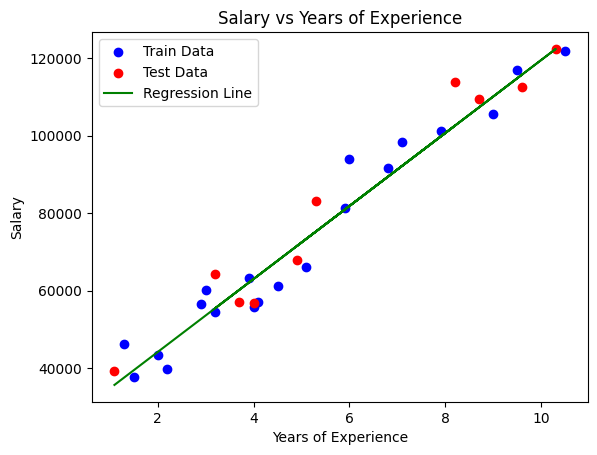

In [164]:
plt.scatter(X_train, y_train, label='Train Data', color='blue')
plt.scatter(X_test, y_test, label='Test Data', color='red')
plt.plot(X_test, y_pred, label='Regression Line', color='green')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.legend()
plt.show()